<a href="https://colab.research.google.com/github/francescobarbara/C6.5-Thoeries-of-Deep-Learning/blob/main/Theories_of_DL_MT2021_PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Training Networks

In this section we will build two Neural Networks, one from scratch, and one based on the high-level functions provided by Tensorflow.

We will build a net from scratch to solve the XOR problem, and to do this we will rely on the backpropagation formulae that you have derived in the problem sheet.

We will also build a network with Tensorflow to introduce you to their API.

## 1(b) XOR problem - NN from Scratch

In this problem we have four possible inputs with two possible outcomes; 

 
> $x_1 = 0, x_2 = 0 \Rightarrow XOR(x_1,x_2)=0$

> $x_1 = 0, x_2 = 1 \Rightarrow XOR(x_1,x_2)=1$

> $x_1 = 1, x_2 = 0 \Rightarrow XOR(x_1,x_2)=1$

> $x_1 = 1, x_2 = 1 \Rightarrow XOR(x_1,x_2)=0$

In the problem sheet you may have noticed that a two layer NN  could solve this problem exactly. Here we will see that on a 2-layer net with Sigmoid activation functions, with a random intialisation and the mean square loss, back-prop is able to converge to a pseudo-optimal solution. We will then consider a visualisation of how the neural network divides the input space as a classifier.



**Exercise** The class for the NeuralNet is already defined except for the backpropagation function, which you have to complete.

Note: Once you have implemented backprop, if you get poor performance, try running the cell again.

In [ ]:
import numpy as np


def sigmoid(x):
    return 1.0/(1+ np.exp(-x))
    
def sigmoid_derivative(x):
    return x * (1.0 - x)



class NeuralNetwork:
    def __init__(self, x, y):
        dimension = 2  #the hidden layer has 2 nodes
        self.input        = x
        #this is W_{0}, in the sheet I transposed it 
        self.weights1     = np.random.rand(dimension, x.shape[1])      #np.array([[-1,1],[1,-1]], dtype=np.float)
        #this is W_{1}
        self.weights2     = np.random.rand(1,dimension)      
        self.bias1        = np.random.rand(dimension,1)      #0.5*np.ones((dimension,1))
        self.bias2        = np.random.rand(1,1)           
        self.y            = y
        self.output       = np.zeros(self.y.shape)
        self.activation   = sigmoid
        self.d_activation = sigmoid_derivative

    def feedforward(self,x):
        self.x = np.expand_dims(x,axis =1)
        self.layer1 = self.activation(self.weights1 @  self.x + self.bias1) #h_{1}
        self.output = self.activation(self.weights2 @ self.layer1 + self.bias2) #h_{2}

    def call(self,x):
      # as above, but does not modify the NNet attributes
        x = np.expand_dims(x,axis =1)
        layer1 = self.activation(self.weights1 @  x + self.bias1)
        output = self.activation(self.weights2 @ layer1 + self.bias2)
        return output

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights1 = np.zeros(self.weights1.shape)
        d_weights2 = np.zeros(self.weights2.shape)
        d_bias1    = np.zeros(self.bias1.shape)
        d_bias2    = np.zeros(self.bias2.shape)
        
        for j in range(4):
          # compute gradient per each input image
          single_input = self.input[j]
          self.feedforward(single_input)
          
          d_bias2    += np.array([[ 2*(self.output[0][0] - self.y[j][0]) * self.d_activation((self.weights2 @ self.layer1 + self.bias2)[0][0]) ]])
          
          d_weights2 += np.array([[2*(self.output[0][0] - self.y[j][0]) * self.layer1[0][0] * self.d_activation((self.weights2 @ self.layer1 + self.bias2)[0][0]) ,
                                  2*(self.output[0][0] - self.y[j][0]) * self.layer1[1][0] * self.d_activation((self.weights2 @ self.layer1 + self.bias2)[0][0]) ]])
         
          
          
          d_h1 = np.array([ [2*(self.output[0][0] - self.y[j][0]) * self.d_activation((self.weights2 @ self.layer1 + self.bias2)[0][0]) * self.weights2[0][0] ] ,
                            [2*(self.output[0][0] - self.y[j][0]) * self.d_activation((self.weights2 @ self.layer1 + self.bias2)[0][0]) * self.weights2[0][1] ] ])
          
          
          d_weights1 += np.array( [ [d_h1[0][0]  * self.d_activation((self.weights1 @ self.x + self.bias1[0])[0][0]) * self.x[0][0] , 
                                     d_h1[0][0]  * self.d_activation((self.weights1 @ self.x + self.bias1[0])[0][0]) * self.x[1][0] ],
                                    [d_h1[1][0]  * self.d_activation((self.weights1 @ self.x + self.bias1[0])[0][0]) * self.x[0][0] , 
                                     d_h1[1][0]  * self.d_activation((self.weights1 @ self.x + self.bias1[0])[0][0]) * self.x[1][0] ] ] )
          
          d_bias1    += np.array( [ [d_h1[0][0]  * self.d_activation((self.weights1 @ self.x + self.bias1)[0][0]) * self.x[0][0] ] , 
                                    [ d_h1[0][0]  * self.d_activation((self.weights1 @ self.x + self.bias1)[0][0]) * self.x[1][0] ] ] )

        self.weights1 -= d_weights1
        self.weights2 -= d_weights2
        self.bias1    -= d_bias1
        self.bias2    -= d_bias2


X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],[1],[1],[0]])

nn = NeuralNetwork(X,y)

for i in range(10000):
    nn.backprop()
for j in range(4):
    nn.feedforward(X[j])
    print('Prediction:\n', nn.x, ' --->' , nn.output)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in double_scalars


Prediction:
 [[0]
 [0]]  ---> [[nan]]
Prediction:
 [[0]
 [1]]  ---> [[nan]]
Prediction:
 [[1]
 [0]]  ---> [[nan]]
Prediction:
 [[1]
 [1]]  ---> [[nan]]


Now we will plot how the domain has been split. In the left figure we will see the outputs of the NN, while on the right we visualise the classification of these outputs i.e. any value above 0.5 identifies class 1, 0 otherwise, which shows us the decision boundary of the classifier.


In [ ]:
import matplotlib.pyplot as plt

mu = np.linspace(0,1,100)
gamma = np.linspace(0,1,100)

# filling the heatmap, value by value
fun_map = np.empty((mu.size, gamma.size))
for i in range(mu.size):
    for j in range(gamma.size):
        net_val = nn.call([mu[i], gamma[j]])
        if net_val>0.5:
          fun_map[i,j] = 1
        else:
          fun_map[i,j] = 0

fun_map_2 = np.empty((mu.size, gamma.size))
for i in range(mu.size):
    for j in range(gamma.size):
        fun_map_2[i,j] = nn.call([mu[i], gamma[j]])

fig = plt.figure()
s = fig.add_subplot(1, 2, 1, xlabel='$x$', ylabel='$y$')
im = s.imshow(
    fun_map_2,
    extent=(gamma[0], gamma[-1], mu[0], mu[-1]),
    origin='lower')
fig.colorbar(im)
s = fig.add_subplot(1, 2, 2, xlabel='$x$', ylabel='$y$')
im = s.imshow(
    fun_map,
    extent=(gamma[0], gamma[-1], mu[0], mu[-1]),
    origin='lower')
fig.colorbar(im)


N.B. The transition fase with the sigmoid activation function is sharp, and so the NN more-or-less splits the domain into piecwise constant regions.

## 1(c) Training MNIST

First, we have to upload the dataset; keras, an interface for tensorflow, allows us to do this with a one line command. We then can use the Sequence model class from TF to add different layers to our network.



**Exercise** You now have to generate a two layer network with hidden dimension of 128 via the sequential command in Tensorflow. This should allow you to achieve 92% accuracy with only15 epochs of training!!

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

print(train_images.shape) # Check if images are loaded correctly
print(train_labels.shape)


(60000, 28, 28)


In [ ]:
print(train_labels.shape)

(60000,)


In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Generate data
x_train = train_images
y_train = train_labels

x_test = test_images
y_test = test_labels

##################### BELOW WRONG ###############################
# build the architecture with Sequential
# ...
model = Sequential(
    [
        Dense(128, activation="relu"),
        
    ]
)

# Compile the model, which involved shoows a loss function, an optimiser, and the performance metrics you want to track

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss="sparse_categorical_crossentropy",           #tf.keras.losses.CategoricalCrossentropy()
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

#model.compile(optimizer='sgd', loss='mse')
# This builds the model for the first time:
#model.fit(x_train, y_train ) #batch_size=32 , epochs=15

#model.summary()

In [ ]:

model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
# train the architecture
#...
model.fit(x_train, y_train, epochs= 15 )

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3565 - sparse_categorical_accuracy: 0.9122
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2626 - sparse_categorical_accuracy: 0.9305
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2351 - sparse_categorical_accuracy: 0.9387
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2274 - sparse_categorical_accuracy: 0.9423
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2052 - sparse_categorical_accuracy: 0.9473
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1981 - sparse_categorical_accuracy: 0.9503
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1923 - sparse_categorical_accuracy: 0.9529
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1815 - sparse_categorical_accuracy: 0.9536
Epoch 9/15
1875/1875 [==========

In [ ]:
# test the performance
# ...
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3084 - sparse_categorical_accuracy: 0.9465


[0.30841904878616333, 0.9465000033378601]

# 2. Expressivity

The **$n$-ap problem** was shown to have an optimal solution with a particular construction of neural network. Do we find these coefficients/weights when training a network with that structure from randomly inittialised weights?

## 2(d) Train NN on n-ap problem

Build the net in the case with $n=2^K, K=3$ and check if it converges.

In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate data
X = np.array([[0],
                  [.125],
                  [.25],
                  [.375],
                  [.5],
                  [.625],
                  [.75],
                  [.875]])
y = np.array([[0],[1],[0],[1],[0],[1],[0],[1]])
x_train = X
y_train = y

# Build a model
# ...
model = Sequential([
  Dense(2, activation='relu'),
  Dense(2, activation='relu'),
  Dense(2, activation='relu'),
  Dense(2, activation='relu'),
  Dense(2, activation='relu'),
  Dense(2, activation='relu'),
  Dense(2, activation='relu'),
  Dense(1),
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# ...
model.fit(x_train, y_train, epochs= 10, verbose = 1)
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

ynew = model.predict(x_train)
for i in range(len(x_train)):
	print("Y=%s, Predicted=%s" % (y_train[i], ynew[i]))

Epoch 1/10
1/1 [==============================] - 1s 732ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 147ms/step - loss: 7.7125 - accuracy: 0.5000

accuracy: 50.00%
Y=[0], Predicted=

In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate data
X = np.array([[0],
                  [.125],
                  [.25],
                  [.375],
                  [.5],
                  [.625],
                  [.75],
                  [.875]])
y = np.array([[0],[1],[0],[1],[0],[1],[0],[1]])
x_train = X
y_train = y





model = Sequential()
width = 2
depth = 6
model.add(Dense(width, input_dim=1, activation='relu'))

for i in range(depth):
  model.add(Dense(width, activation='relu'))
model.add(Dense(1))


model.compile(loss='binary_crossentropy', optimizer = 'adam',  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200, batch_size=32,verbose=0)

scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

ynew = model.predict(x_train)
for i in range(len(x_train)):
	print("Y=%s, Predicted=%s" % (y_train[i], ynew[i]))
 
model.summary()

1/1 [==============================] - 0s 137ms/step - loss: 7.7125 - accuracy: 0.5000

accuracy: 50.00%
Y=[0], Predicted=[0.]
Y=[1], Predicted=[0.]
Y=[0], Predicted=[0.]
Y=[1], Predicted=[0.]
Y=[0], Predicted=[0.]
Y=[1], Predicted=[0.]
Y=[0], Predicted=[0.]
Y=[1], Predicted=[0.]
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_133 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_134 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_135 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_136 (Dense)            (None, 

In [15]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_61 (Dense)             (None, 2)               

And now let's plot the modelled function




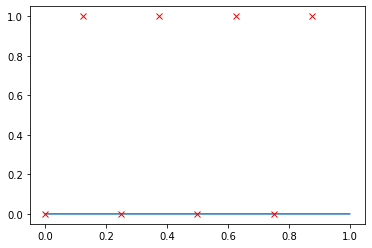

In [16]:
import matplotlib.pyplot as plt

def plot_model(nn,x,y):
  xx = np.linspace(0,1,10000)
  yy = nn.predict(xx)
  fig = plt.figure()
  plt.plot(xx,yy)
  plt.plot(x,y, 'rx')
  
plot_model(model, x_train, y_train)

## 2(e) Perturbed Solution of the n-ap problem

Why is this optimum so hard to find? Let's implement the optimal function directly and see how a small perturbation to the parameters changes the function it computes.

In [33]:
# Fill in the weights and bias vactors given the optimal function to be composed, given in question 1b

w1 = np.array([[1],
      [1]])
w2 = np.array([[2, -4]])
b1 = np.array([[0],
      [-1/2]])

In [34]:
def relu(x):
  return np.maximum(x,0)

class f():
  def __init__(self, num_blocks, noise_stddev=0):
    self.weights  = []
    self.biases = []
    for i in range(num_blocks):
      w1_n = w1+ np.random.normal(scale = noise_stddev, size = w1.shape)
      w2_n = w2+ np.random.normal(scale = noise_stddev, size = w2.shape)
      b1_n = b1+ np.random.normal(scale = noise_stddev, size = b1.shape)
      self.weights.append([w1_n,w2_n])
      self.biases.append(b1_n)
  
  def forward(self,x):
    output = x
    for i in range(len(self.weights)):
      output = relu(self.weights[i][1] @ (relu(self.weights[i][0] @ output + self.biases[i])))
    return output

In [35]:
x = np.expand_dims(np.linspace(0,1,10000), 0)

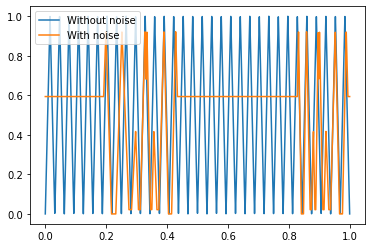

In [36]:
no_noise = f(6,0)
noise = f(6,0.1)

plt.figure()
plt.plot(x[0,:], no_noise.forward(x).T, label = "Without noise")

plt.plot(x[0,:], noise.forward(x).T, label = "With noise")
plt.legend()

## 2(f) Interatction Between Detph and Width

Learning a piecewise smooth function from sample values


Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0970 - mse: 0.0970
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0585 - mse: 0.0585
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0526 - mse: 0.0526
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0215 - mse: 0.0215
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0051 - mse: 0.0051
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0032 - mse: 0.0032
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0034 - mse: 0.0034
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0027 - mse: 0.0027
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0022 - mse: 0.0022
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0021 - mse: 0.0021
Epoch 11/20
313/313 [============================

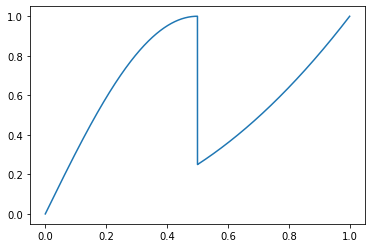

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

train_samples=10000

x_train=np.expand_dims(np.sort(np.random.uniform(0,1,train_samples)), 1)

#generate samples of y=sin(x * pi) for x\in[0,1) and y=x^2 for x\in[1/2,1]
def test_func(x):
    return np.sin(x*np.pi)*(x<1/2) + x**2*(x>=1/2)

y_train=test_func(x_train)

#uncommenting the below shows the samples
plt.figure()
plt.plot(x_train,y_train)

#we now train a network base on the samples (x_train,y_train) and evaluate it on x_test.

#consider varying the network width and depth, 
#width and depth are controlled through the variables "width" and "depths respectively", 

width=10
depth=10

model = Sequential()
model.add(Dense(width, input_dim=1, activation='relu'))

for i in range(depth-2):
  model.add(Dense(width, activation='relu'))

model.add(Dense(1))

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer = 'adam',  metrics=['mse'])

model.fit(x_train, y_train, epochs=20, batch_size=32,verbose=1)

scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

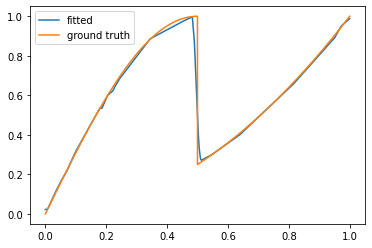

In [40]:
x_test=np.linspace(0,1,10000)
y_test = test_func(x_test)

x_test = np.expand_dims(x_test,  axis=1)
y_test_estimate = model(x_test)

plt.figure()
plt.plot(x_test,y_test_estimate, label = "fitted")
plt.plot(x_test, y_test, label = "ground truth")
plt.legend()

Try and do something similar to the code above - but for a 2-d function
